In [751]:
# import os
# import shutil
# import random

# # A 폴더 경로 (이미지 파일이 있는 폴더)
# a_folder = r'G:\내 드라이브\project_poster\balance_data_rates\romance_augmented'

# # B 폴더 경로 (이미지를 복사할 폴더)
# b_folder = r'G:\내 드라이브\project_poster\balance_data_rates\#new'

# # 복사할 파일 개수 설정
# num_to_copy = 30  # 원하는 개수만큼 복사

# # 이미지 파일을 랜덤으로 선택하고 복사하는 함수
# def copy_random_images(a_folder, b_folder, num_to_copy):
#     # B 폴더가 존재하지 않으면 생성
#     if not os.path.exists(b_folder):
#         os.makedirs(b_folder)
    
#     # A 폴더 내의 모든 jpg 파일 목록을 가져옴
#     all_files = [f for f in os.listdir(a_folder) if f.endswith('.jpg')]
    
#     # 랜덤으로 선택
#     files_to_copy = random.sample(all_files, min(num_to_copy, len(all_files)))
    
#     # 선택된 파일을 B 폴더로 복사
#     for file in files_to_copy:
#         src_path = os.path.join(a_folder, file)
#         dst_path = os.path.join(b_folder, file)
#         try:
#             shutil.copy2(src_path, dst_path)
#             print(f"Copied: {src_path} to {dst_path}")
#         except Exception as e:
#             print(f"Error copying {src_path}: {e}")

# # 실행
# copy_random_images(a_folder, b_folder, num_to_copy)


# 폴더에 있는 이미지 장르의 빈도수 세기

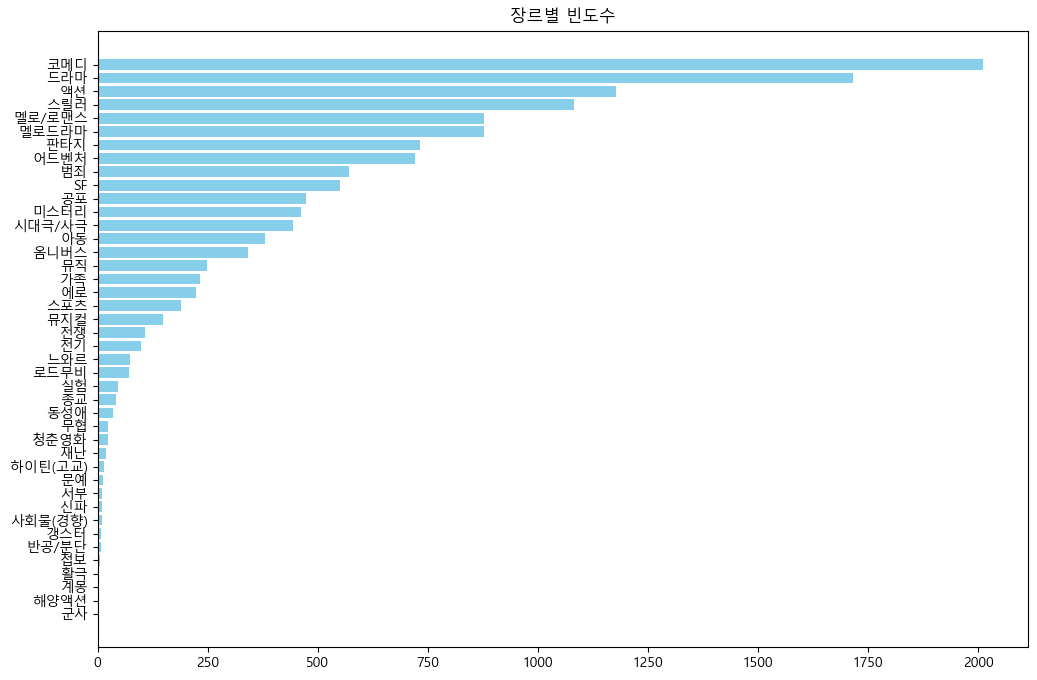

In [752]:
import os
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# genre_mapping은 기존에 제공된 딕셔너리와 동일
genre_mapping = {
    "드라마": 1 << 43, "첩보": 1 << 42, "옴니버스": 1 << 41, "뮤직": 1 << 40,
    "동성애": 1 << 39, "로드무비": 1 << 38, "아동": 1 << 37, "하이틴(고교)": 1 << 36,
    "전기": 1 << 35, "청춘영화": 1 << 34, "재난": 1 << 33, "문예": 1 << 32,
    "연쇄극": 1 << 31, "신파": 1 << 30, "활극": 1 << 29, "반공/분단": 1 << 28,
    "군사": 1 << 27, "계몽": 1 << 26, "사회물(경향)": 1 << 25, "스포츠": 1 << 24,
    "합작(번안물)": 1 << 23, "종교": 1 << 22, "무협": 1 << 21, "미스터리": 1 << 20,
    "SF": 1 << 19, "코메디": 1 << 18, "느와르": 1 << 17, "액션": 1 << 16,
    "범죄": 1 << 15, "어드벤처": 1 << 14, "가족": 1 << 13, "에로": 1 << 12,
    "멜로/로맨스": 1 << 11, "멜로드라마": 1 << 11, "공포": 1 << 10, "뮤지컬": 1 << 9,
    "시대극/사극": 1 << 8, "실험": 1 << 7, "스릴러": 1 << 5, "서부": 1 << 4,
    "전쟁": 1 << 3, "갱스터": 1 << 2, "판타지": 1 << 1, "해양액션": 1 << 0
}

# 장르 빈도수를 저장하기 위한 Counter
genre_counter = Counter()

# 파일명이 저장된 폴더 경로
image_folder = r'G:\내 드라이브\project_poster\balance_data_rates\#new'

# resized_genre_mapping = {
# -    "1드라마": ["드라마", "청춘영화", "사회물(경향)",'가족', '하이틴(고교)'],
# ---   "2코메디": ["코메디"],
# --    '3로맨스': ['멜로/로맨스', '멜로드라마', '에로','동성애'],
# --    "4액션": ["액션", "재난", "범죄", "느와르",
#            '활극','첩보','해양액션', "서부", "갱스터", '무협',
#            "전쟁", "군사",'반공/분단'],
#     "5SF/판타지": ["SF", "판타지", "어드벤처"],
#     "6공포": ["공포", "스릴러", "미스터리"],
#     "7기타": ["옴니버스", "종교", "실험",'스포츠', '계몽', '문예', '신파', "뮤지컬",
#            "뮤직",'시대극/사극','전기', "아동",'로드무비']
# }

# 장르별 빈도수를 계산하는 함수
def count_genres_from_files(image_folder):
    # 폴더 내 파일을 순회하며
    for filename in os.listdir(image_folder):
        if filename.endswith('.jpg'):
            # 각 파일명에서 비트 플래그 추출
            movieNum = int(filename.split('_')[1].split('.')[0])
            # 파일 이름의 맨 앞 숫자 추출
            first_digit = filename[0]

            # 파일 이름에 '!'가 포함된 경우
            if '!' in filename:
                # if first_digit == '1':
                #     # 오직 신파, 종교 장르만 카운트
                #     for genre in ["드라마", "청춘영화", "사회물(경향)",'가족', '하이틴(고교)']:
                #         if movieNum & genre_mapping[genre]:
                #             genre_counter[genre] += 1
                if first_digit == '2':
                    # 오직 코메디, 액션 장르만 카운트
                    for genre in ["코메디"]:
                        if movieNum & genre_mapping[genre]:
                            genre_counter[genre] += 1
                elif first_digit == '3':
                    # 오직 코메디, 액션 장르만 카운트
                    for genre in ['멜로/로맨스', '멜로드라마', '에로','동성애']:
                        if movieNum & genre_mapping[genre]:
                            genre_counter[genre] += 1
                elif first_digit == '4':
                    # 오직 코메디, 액션 장르만 카운트
                    for genre in ["액션", "재난", "범죄", "느와르",
                                  '활극','첩보','해양액션', "서부",
                                  "갱스터", '무협', "전쟁", "군사",'반공/분단']:
                        if movieNum & genre_mapping[genre]:
                            genre_counter[genre] += 1
                elif first_digit == '5':
                    # 오직 코메디, 액션 장르만 카운트
                    for genre in ["SF", "판타지", "어드벤처"]:
                        if movieNum & genre_mapping[genre]:
                            genre_counter[genre] += 1
                elif first_digit == '6':
                    # 오직 코메디, 액션 장르만 카운트
                    for genre in ["공포", "스릴러", "미스터리"]:
                        if movieNum & genre_mapping[genre]:
                            genre_counter[genre] += 1
                elif first_digit == '7':
                    # 오직 코메디, 액션 장르만 카운트
                    for genre in ["옴니버스", "종교", "실험",'스포츠', '계몽',
                                  '문예', '신파', "뮤지컬", "뮤직",'시대극/사극',
                                  '전기', "아동",'로드무비']:
                        if movieNum & genre_mapping[genre]:
                            genre_counter[genre] += 1
                # '!'가 있고 첫 글자가 7 또는 2가 아닐 경우, 카운트하지 않음
            else:
                # '!'가 없을 경우에는 모든 장르 카운트
                for genre, bitmask in genre_mapping.items():
                    if movieNum & bitmask:
                        genre_counter[genre] += 1

# 장르 빈도수 세기 실행
count_genres_from_files(image_folder)
genre_counts = {}

# 결과 출력
for genre, count in sorted(genre_counter.items(), key=lambda x:x[1], reverse=True):
    genre_counts[genre] = count

# C:\Windows\Fonts
font_path = r'C:\ex\prj_poster\MALGUN.TTF'
font_name = fm.FontProperties(fname=font_path).get_name()

# 장르와 빈도수 리스트로 변환
genres = list(genre_counts.keys())
counts = list(genre_counts.values())

# 막대그래프 생성
plt.figure(figsize=(12, 8))
plt.rc('font', family=font_name)
plt.barh(genres, counts, color='skyblue')
plt.title('장르별 빈도수')
plt.gca().invert_yaxis()  # y축 역전
plt.show()


In [753]:
genre_counts

{'코메디': 2012,
 '드라마': 1716,
 '액션': 1178,
 '스릴러': 1082,
 '멜로/로맨스': 877,
 '멜로드라마': 877,
 '판타지': 732,
 '어드벤처': 721,
 '범죄': 570,
 'SF': 550,
 '공포': 474,
 '미스터리': 462,
 '시대극/사극': 444,
 '아동': 380,
 '옴니버스': 341,
 '뮤직': 249,
 '가족': 232,
 '에로': 223,
 '스포츠': 190,
 '뮤지컬': 149,
 '전쟁': 108,
 '전기': 98,
 '느와르': 73,
 '로드무비': 72,
 '실험': 46,
 '종교': 42,
 '동성애': 35,
 '무협': 24,
 '청춘영화': 23,
 '재난': 20,
 '하이틴(고교)': 14,
 '문예': 12,
 '서부': 11,
 '신파': 11,
 '사회물(경향)': 10,
 '갱스터': 8,
 '반공/분단': 7,
 '첩보': 6,
 '활극': 4,
 '계몽': 2,
 '해양액션': 2,
 '군사': 2}

# 비슷한 장르끼리 묶기

In [754]:
resized_genre_mapping = {
    "드라마": ["드라마", "청춘영화", "사회물(경향)",'가족', '하이틴(고교)'],
    "코메디": ["코메디"],
    '로맨스': ['멜로/로맨스', '멜로드라마', '에로','동성애'],
    "액션": ["액션", "재난", "범죄", "느와르",
           '활극','첩보','해양액션', "서부", "갱스터", '무협',
           "전쟁", "군사",'반공/분단'],
    "SF/판타지": ["SF", "판타지", "어드벤처"],
    "공포": ["공포", "스릴러", "미스터리"],
    "기타": ["옴니버스", "종교", "실험",'스포츠', '계몽', '문예', '신파', "뮤지컬",
           "뮤직",'시대극/사극','전기', "아동",'로드무비']
}

list1=[]

for k, v in resized_genre_mapping.items():
    for i in v:
        # print(i)
        list1.append(i)
        
print(len(list1))

42


In [755]:
# resized_genre_mapping = {
# -    "1드라마": ["드라마", "청춘영화", "사회물(경향)",'가족', '하이틴(고교)'],
# ---   "2코메디": ["코메디"],
# --    '3로맨스': ['멜로/로맨스', '멜로드라마', '에로','동성애'],
# --    "4액션": ["액션", "재난", "범죄", "느와르",
#            '활극','첩보','해양액션', "서부", "갱스터", '무협',
#            "전쟁", "군사",'반공/분단'],
# --    "5SF/판타지": ["SF", "판타지", "어드벤처"],
# --   "6공포": ["공포", "스릴러", "미스터리"],
# -    "7기타": ["옴니버스", "종교", "실험",'스포츠', '계몽', '문예', '신파', "뮤지컬",
#            "뮤직",'시대극/사극','전기', "아동",'로드무비']
# }

# 이미지를 백업 폴더로 옮겨서 개수 조절하기

In [756]:
# import os
# import shutil

# # 파일이 저장된 폴더 경로
# image_folder = r'G:\내 드라이브\project_poster\balance_data_rates\#new'

# # 백업할 폴더 경로
# backup_folder = r'G:\내 드라이브\project_poster\balance_data_rates\backup_deleted_images'

# # 백업할 파일 개수 설정
# num_to_backup = 50  # 원하는 개수만큼 백업

# # 백업할 파일들을 추출하고 이동하는 함수
# def backup_specific_files(image_folder, backup_folder, num_to_backup):
#     # 백업 폴더가 존재하지 않으면 생성
#     if not os.path.exists(backup_folder):
#         os.makedirs(backup_folder)
    
#     # 폴더 내 파일을 순회하며 백업할 파일 리스트를 만듦
#     files_to_backup = []
    
#     for filename in os.listdir(image_folder):
#         if filename.endswith('.jpg'):
#             # 첫 글자 확인
#             first_digit = filename[0]
            
#             # 파일 이름에 '!'가 포함되고, 첫 글자가 '4'일 경우만
#             if '!' in filename and first_digit == '3':
#                 files_to_backup.append(filename)

#             # 원하는 개수만큼 파일을 추출하면 중단
#             if len(files_to_backup) >= num_to_backup:
#                 break

#     # 추출한 파일을 백업 폴더로 이동
#     for file in files_to_backup:
#         src_path = os.path.join(image_folder, file)
#         dst_path = os.path.join(backup_folder, file)
#         try:
#             shutil.move(src_path, dst_path)
#             print(f"Moved: {src_path} to {dst_path}")
#         except Exception as e:
#             print(f"Error moving {src_path}: {e}")

# # 실행
# backup_specific_files(image_folder, backup_folder, num_to_backup)

In [757]:
# import os
# import shutil

# # A 폴더 경로 (파일이 있는 폴더)
# a_folder = r'G:\내 드라이브\project_poster\balance_data_rates\#new'

# # B 폴더 경로 (파일을 옮길 폴더)
# b_folder = r'G:\내 드라이브\project_poster\balance_data_rates\backup_deleted_images'

# # 원하는 개수 설정
# num_to_move = 100  # 옮길 파일 개수

# # 장르 비트 플래그 (예시로 넣었습니다. 자신의 매핑을 사용하세요)
# genre_mapping_drama = {
#     "드라마": 1 << 43
# }

# # 특정 조건에 맞는 파일을 A 폴더에서 B 폴더로 옮기는 함수
# def move_genre_files(image_folder, backup_folder, num_to_move):
#     files_to_move = []
    
#     # 폴더 내 파일을 순회하며 조건에 맞는 파일을 찾음
#     for filename in os.listdir(image_folder):
#         if filename.endswith('.jpg'):
#             # 파일명에서 비트 플래그 추출
#             movieNum = int(filename.split('_')[1].split('.')[0])
            
#             # 장르 조건 확인 (예시로 drama 장르와 매핑 비교)
#             for genre, bitmask in genre_mapping_drama.items():
#                 if movieNum & bitmask:
#                     files_to_move.append(filename)
#                     break  # 조건에 맞는 파일이 있으면 더 이상의 장르 확인은 필요 없음

#         # 지정한 개수만큼 파일을 찾으면 중단
#         if len(files_to_move) >= num_to_move:
#             break

#     # B 폴더가 없으면 생성
#     if not os.path.exists(backup_folder):
#         os.makedirs(backup_folder)

#     # 조건에 맞는 파일을 B 폴더로 옮김
#     for file in files_to_move:
#         src_path = os.path.join(image_folder, file)
#         dst_path = os.path.join(backup_folder, file)
#         try:
#             shutil.move(src_path, dst_path)
#             print(f"Moved: {src_path} to {dst_path}")
#         except Exception as e:
#             print(f"Error moving {src_path}: {e}")

# # 실행
# move_genre_files(a_folder, b_folder, num_to_move)

# 필요할 시 이미지 복원

In [758]:
# import os
# import shutil

# # 파일이 삭제되기 전 원본을 저장하는 폴더 경로 (백업 폴더)
# backup_folder = r'G:\내 드라이브\project_poster\balance_data_rates\backup_deleted_images'

# # 원본 파일이 저장된 폴더 경로 (복원할 폴더)
# image_folder = r'G:\내 드라이브\project_poster\balance_data_rates\#new'

# # 복원할 파일 개수 설정
# num_to_restore = 50  # 원하는 개수만큼 복원

# # 최근에 삭제된 파일을 복원하는 함수
# def restore_deleted_files(backup_folder, image_folder, num_to_restore):
#     # 백업 폴더에서 삭제된 파일 목록을 가져옴 (최근 파일부터 정렬)
#     deleted_files = [file for file in os.listdir(backup_folder) if file.endswith('.jpg')]
    
#     if len(deleted_files) == 0:
#         print("복원할 파일이 없습니다.")
#         return

#     # 파일의 마지막 수정 시간 기준으로 정렬 (최신 파일부터)
#     deleted_files.sort(key=lambda file: os.path.getmtime(os.path.join(backup_folder, file)), reverse=True)

#     # 최신 파일 중에서 복원할 파일을 선택 (최대 num_to_restore 개수)
#     files_to_restore = deleted_files[:min(num_to_restore, len(deleted_files))]

#     # 선택한 파일을 원래 폴더로 이동하여 복원
#     for file in files_to_restore:
#         src_path = os.path.join(backup_folder, file)
#         dst_path = os.path.join(image_folder, file)
#         try:
#             shutil.move(src_path, dst_path)  # 파일을 복사하지 않고 이동
#             print(f"Moved: {dst_path}")
#         except Exception as e:
#             print(f"Error moving {file}: {e}")

# # 실행
# restore_deleted_files(backup_folder, image_folder, num_to_restore)

# 묶음 장르의 빈도수 세기

In [759]:
# 묶음 장르 빈도수 계산
final_counts = {}

# 각 묶음 장르에 대한 최종 빈도수 계산
for group, genres in resized_genre_mapping.items():
    total_count = sum(genre_counts.get(genre, 0) for genre in genres)  # 해당 장르의 빈도수를 합산
    final_counts[group] = total_count

# 최종 결과 출력
# print("묶음 장르 총합 빈도수:")
for group, count in sorted(final_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"\"{group}\": {count},")

"기타": 2036,
"공포": 2018,
"액션": 2013,
"코메디": 2012,
"로맨스": 2012,
"SF/판타지": 2003,
"드라마": 1995,


In [760]:
# resized_genre_mapping = {
# -    "1드라마": ["드라마", "청춘영화", "사회물(경향)",'가족', '하이틴(고교)'],
# ---   "2코메디": ["코메디"],
# --    '3로맨스': ['멜로/로맨스', '멜로드라마', '에로','동성애'],
# --    "4액션": ["액션", "재난", "범죄", "느와르",
#            '활극','첩보','해양액션', "서부", "갱스터", '무협',
#            "전쟁", "군사",'반공/분단'],
# --    "5SF/판타지": ["SF", "판타지", "어드벤처"],
# --   "6공포": ["공포", "스릴러", "미스터리"],
# -    "7기타": ["옴니버스", "종교", "실험",'스포츠', '계몽', '문예', '신파', "뮤지컬",
#            "뮤직",'시대극/사극','전기', "아동",'로드무비']
# }


# 묶음 장르의 빈도수 시각화

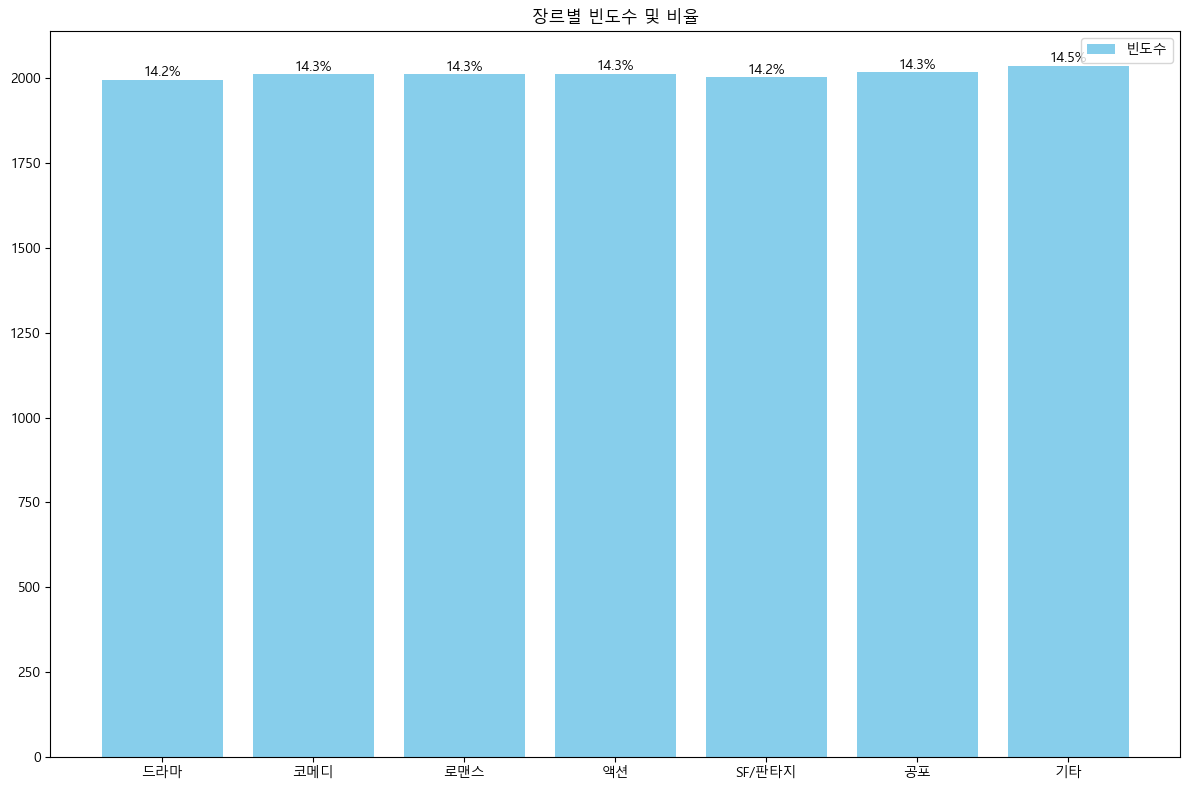

In [761]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
font_path = r'C:\ex\prj_poster\MALGUN.TTF'  # 사용자 정의 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()

# 장르와 빈도수 리스트로 변환
genres2 = list(final_counts.keys())
counts2 = list(final_counts.values())

# 빈도수 비율 계산
total_count = sum(counts2)
ratios2 = [(count / total_count) * 100 for count in counts2]  # 비율(%)

# 막대그래프 생성
plt.figure(figsize=(12, 8))  # 그래프 크기 설정
plt.rc('font', family=font_name)  # 사용자 정의 폰트 적용
plt.bar(genres2, counts2, color='skyblue', label='빈도수')  # 세로 막대 그래프

# 빈도수 비율을 그래프에 추가
for i in range(len(genres2)):
    plt.text(i, counts2[i] + 10, f'{ratios2[i]:.1f}%', ha='center')  # 비율 표시

# 라벨 및 제목 설정
plt.title('장르별 빈도수 및 비율')
# plt.ylabel('빈도수')
# plt.xlabel('장르')
plt.tight_layout()  # 레이아웃 자동 조정
plt.legend()  # 범례 추가
plt.show()  # 그래프 출력


In [762]:
error:

SyntaxError: invalid syntax (3359091078.py, line 1)